In [ ]:
#importing kaggle
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls /content/drive


MyDrive


In [ ]:
!find /content/drive -name kaggle.json

/content/drive/MyDrive/MyDrive kaggle/kaggle.json


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'  'MyDrive kaggle'


In [ ]:
!ls /content

drive  sample_data


In [ ]:
#locating the dataset
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/MyDrive kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importing the dataset
!kaggle datasets download -d pratyushakar/rossmann-store-sales

Dataset URL: https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales
License(s): CC0-1.0
  0% 0.00/6.90M [00:00<?, ?B/s]
100% 6.90M/6.90M [00:00<00:00, 728MB/s]


In [ ]:
#extracting the zip file
from zipfile import ZipFile
dataset="/content/rossmann-store-sales.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("successfull")

successfull


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sales_dataset=pd.read_csv("/content/train.csv")

/tmp/ipython-input-3010633490.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_dataset=pd.read_csv("/content/train.csv")


In [ ]:
sales_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_dataset.shape

(1017209, 9)

In [ ]:
sales_dataset.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
store_dataset=pd.read_csv("/content/store.csv")

In [ ]:
store_dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_dataset.shape

(1115, 10)

In [ ]:
store_dataset.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


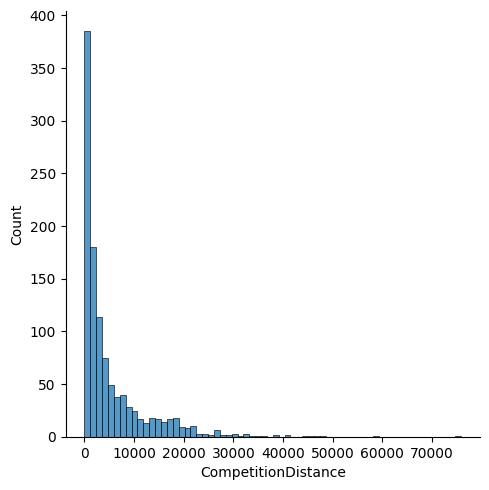

In [ ]:
sns.displot(store_dataset["CompetitionDistance"])

In [ ]:
store_dataset.fillna({"CompetitonDistance":store_dataset["CompetitionDistance"].mode()},inplace=True)

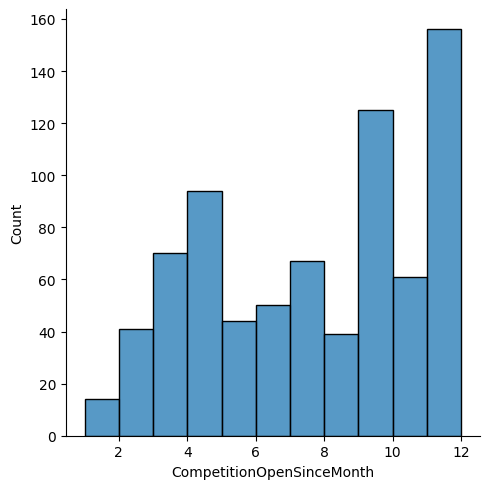

In [ ]:
sns.displot(store_dataset["CompetitionOpenSinceMonth"])

In [ ]:
store_dataset.fillna({"CompetitionOpenSinceMonth":store_dataset['CompetitionOpenSinceMonth'].mean},inplace=True)

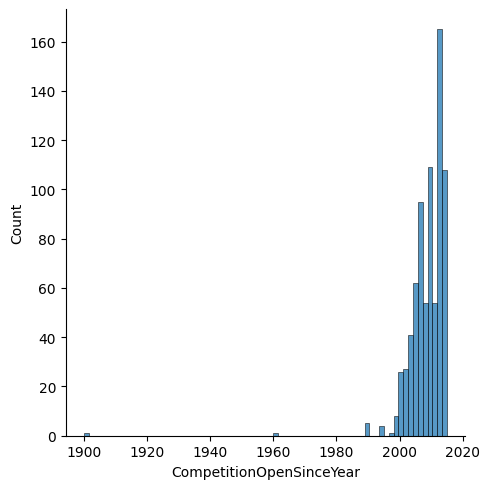

In [ ]:
sns.displot(store_dataset['CompetitionOpenSinceYear'])

In [ ]:
store_dataset.fillna({"CompetitionOpenSinceYear":store_dataset["CompetitionOpenSinceYear"].median()},inplace=True)

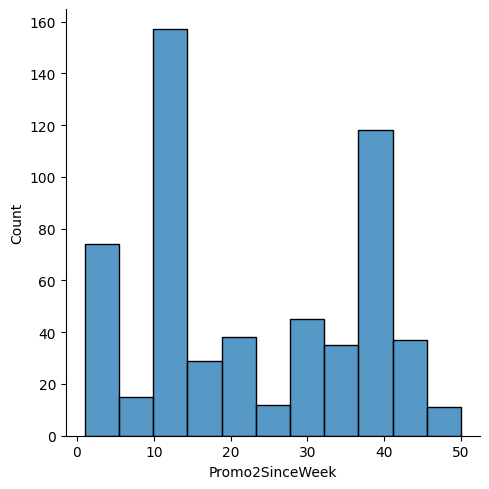

In [ ]:
sns.displot(store_dataset['Promo2SinceWeek'])

In [ ]:
store_dataset.fillna({"Promo2SinceWeek":store_dataset["Promo2SinceWeek"].mean()},inplace=True)

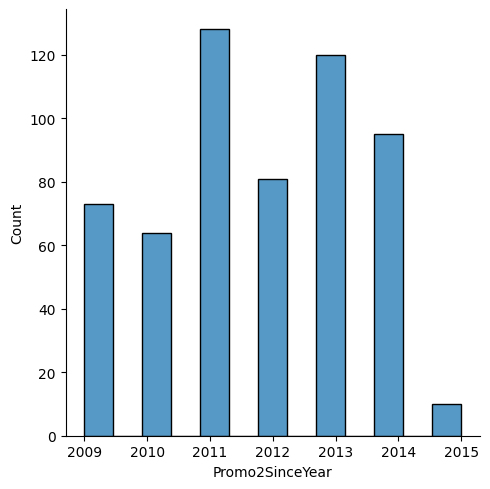

In [ ]:
sns.displot(store_dataset['Promo2SinceYear'])

In [ ]:
store_dataset.fillna({"Promo2SinceYear":store_dataset["Promo2SinceYear"].mean()},inplace=True)

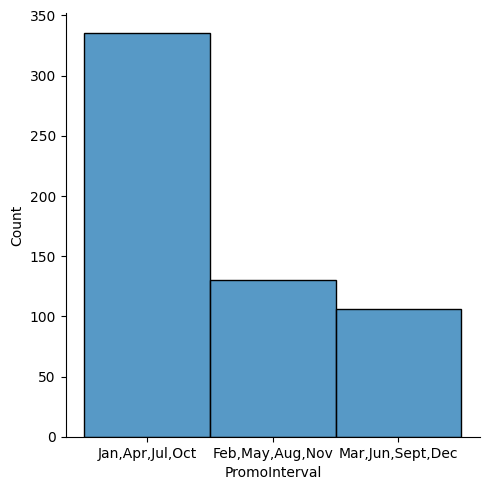

In [ ]:
sns.displot(store_dataset['PromoInterval'])

In [ ]:
store_dataset.fillna({"PromoInterval":"unknown"},inplace=True)

In [ ]:
test_dataset=pd.read_csv("/content/test.csv")

In [ ]:
test_dataset.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
test_dataset.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


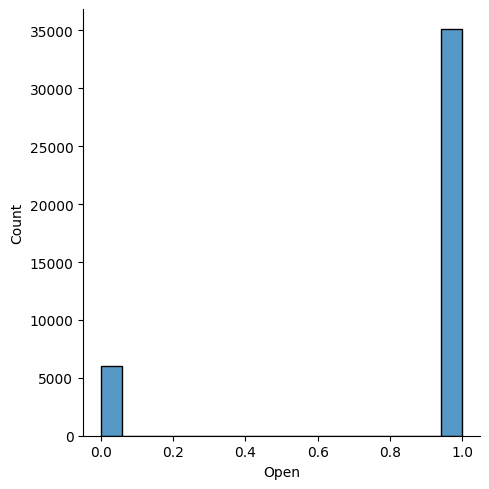

In [ ]:
sns.displot(test_dataset["Open"])

In [ ]:
test_dataset.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
test_dataset.fillna({"Open":test_dataset["Open"].mode()[0]},inplace=True)

In [ ]:
test_dataset.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
sales_dataset["Date"]=pd.to_datetime(sales_dataset["Date"])
sales_dataset=sales_dataset.sort_values("Date")

In [ ]:
sales_dataset["month"]=sales_dataset["Date"].dt.month

In [ ]:
sales_dataset["Year"]=sales_dataset["Date"].dt.year

In [ ]:
sales_dataset=sales_dataset.set_index("Date")

In [ ]:
sales_monthly=sales_dataset["Sales"].resample("ME").sum()

[]

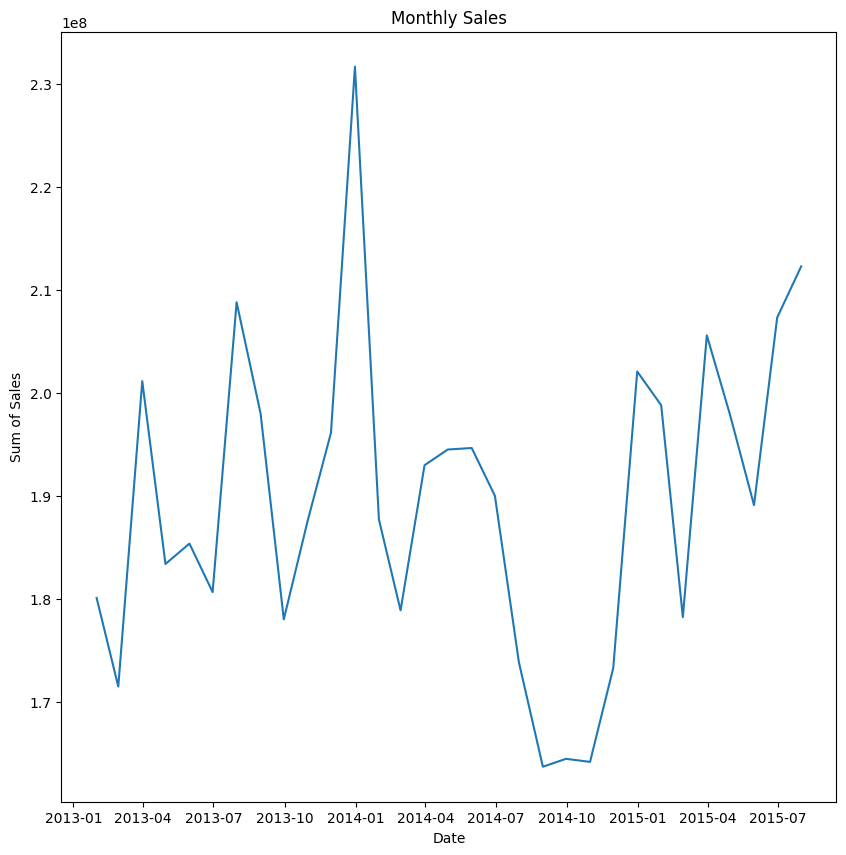

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sales_monthly.index,sales_monthly.values)
plt.title("Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sum of Sales")
plt.plot()

In [ ]:
sales_week=sales_dataset["Sales"].resample("W").sum()

[]

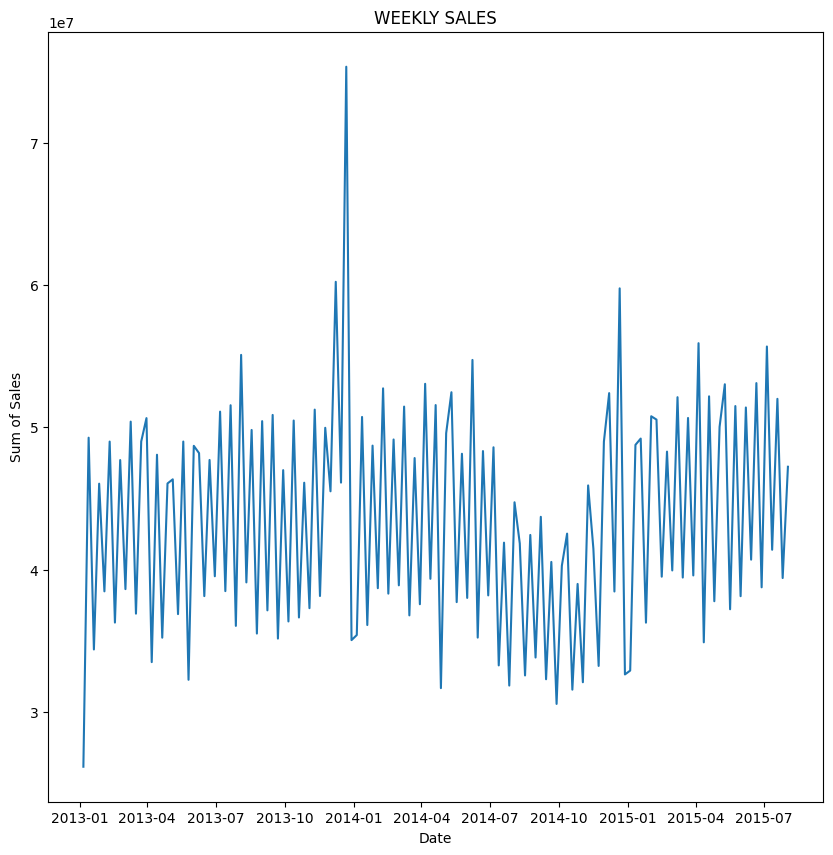

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sales_week.index,sales_week.values)
plt.title("WEEKLY SALES")
plt.xlabel("Date")
plt.ylabel("Sum of Sales")
plt.plot()

In [ ]:
sales_dataset["Isholiday"]=sales_dataset["SchoolHoliday"].apply(lambda x:"yes" if x==1 else "working")

In [ ]:
sales_dataset["sales_lag"]=sales_dataset["Sales"].shift(1)
sales_dataset["rolling_30"]=sales_dataset["Sales"].rolling(30).mean()

In [ ]:
train_size=int(len(sales_dataset)*0.8)
train=sales_dataset.iloc[:train_size]
test=sales_dataset[train_size:]

In [ ]:
from os import name
state_holidays=sales_dataset[sales_dataset["StateHoliday"]!=0].index.to_frame(name="ds")
state_holidays["holiday"]="stateholiday"

In [ ]:
state_holidays.reset_index(drop=True)

,ds,holiday
0,2013-01-01,stateholiday
1,2013-01-01,stateholiday
2,2013-01-01,stateholiday
3,2013-01-01,stateholiday
4,2013-01-01,stateholiday
...,...,...
886132,2015-07-31,stateholiday
886133,2015-07-31,stateholiday
886134,2015-07-31,stateholiday
886135,2015-07-31,stateholiday


In [ ]:
from os import name
school_holidays=sales_dataset[sales_dataset['SchoolHoliday']==1].index.to_frame(name="ds")
school_holidays["holiday"]="schoolholidays"

In [ ]:
school_holidays.reset_index(drop=True)

,ds,holiday
0,2013-01-01,schoolholidays
1,2013-01-01,schoolholidays
2,2013-01-01,schoolholidays
3,2013-01-01,schoolholidays
4,2013-01-01,schoolholidays
...,...,...
181716,2015-07-31,schoolholidays
181717,2015-07-31,schoolholidays
181718,2015-07-31,schoolholidays
181719,2015-07-31,schoolholidays


In [ ]:
holiday_df=pd.concat([state_holidays,school_holidays])
holiday_df["lower_window"]=0
holiday_df["upper_window"]=1
holiday_df=holiday_df.drop_duplicates()

In [ ]:
from prophet import Prophet
model_1=Prophet(holidays=holiday_df)
model_1.add_regressor("Customers")
model_1.add_regressor("Promo")

In [ ]:
#dataframe
df_prophet=sales_dataset.copy()
df_prophet["ds"]=df_prophet.index
df_prophet=df_prophet[["ds","Sales","Customers","Promo"]]
df_prophet=df_prophet.rename(columns={"Sales":"y"})

In [ ]:
print(df_prophet.columns)

Index(['ds', 'y', 'Customers', 'Promo'], dtype='object')


In [ ]:
#train the model
model_1.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#forecasting
future=model_1.make_future_dataframe(periods=30)
future["Customers"]=df_prophet["Customers"].mean()
future["Promo"]=0
forecast=model_1.predict(future)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:555: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_holidays = pd.concat((all_holidays, holidays_to_add),
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:555: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_holidays = pd.concat((all_holidays, holidays_to_add),


In [ ]:
print(forecast)

            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2013-01-01  5045.584052  3125.802258  6875.527867  5045.584052   
1   2013-01-02  5045.374358  3409.020491  7061.863970  5045.374358   
2   2013-01-03  5045.164664  3143.253481  6853.479644  5045.164664   
3   2013-01-04  5044.954970  3292.285759  6956.021404  5044.954970   
4   2013-01-05  5044.745277  3664.500021  7484.136506  5044.745277   
..         ...          ...          ...          ...          ...   
967 2015-08-26  5369.117209  3294.209537  7068.424739  5353.413941   
968 2015-08-27  5370.144118  3293.487621  7038.085948  5353.632776   
969 2015-08-28  5371.171028  3325.154671  6966.577484  5352.966189   
970 2015-08-29  5372.197937  3850.344833  7737.288518  5352.822871   
971 2015-08-30  5373.224846  2153.759183  5870.740471  5352.319625   

     trend_upper  Customers  Customers_lower  Customers_upper  Promo  ...  \
0    5045.584052        0.0              0.0              0.0    0.0  ...   
1    

In [ ]:
test.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Year,Isholiday,sales_lag,rolling_30
Date,,,,,,,,,,,,,
2015-01-30,965,5,9061,893,1,1,0,0,1,2015,working,6568.0,8083.366667
2015-01-30,964,5,9521,1227,1,1,0,0,1,2015,working,9061.0,8094.566667
2015-01-30,963,5,13540,1143,1,1,0,0,1,2015,working,9521.0,8414.733333
2015-01-30,962,5,8588,1031,1,1,0,0,1,2015,working,13540.0,8531.266667
2015-01-30,961,5,8223,840,1,1,0,0,1,2015,working,8588.0,8538.866667


In [ ]:
test.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Year,Isholiday,sales_lag,rolling_30
Date,,,,,,,,,,,,,
2015-01-30,965,5,9061,893,1,1,0,0,1,2015,working,6568.0,8083.366667
2015-01-30,964,5,9521,1227,1,1,0,0,1,2015,working,9061.0,8094.566667
2015-01-30,963,5,13540,1143,1,1,0,0,1,2015,working,9521.0,8414.733333
2015-01-30,962,5,8588,1031,1,1,0,0,1,2015,working,13540.0,8531.266667
2015-01-30,961,5,8223,840,1,1,0,0,1,2015,working,8588.0,8538.866667


In [ ]:
ytrue=test["Sales"].values
ypred=forecast.set_index("ds").loc[test.index,"yhat"].values
from sklearn.metrics import mean_absolute_error
#for actual,predicted in zip(ytrue,ypred):
mae=mean_absolute_error(ytrue,ypred)
print("MAE:",mae)


MAE: 2719.9458413918155


In [ ]:
sales_dataset.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Year,Isholiday,sales_lag,rolling_30
Date,,,,,,,,,,,,,
2015-07-31,746,5,9082,638,1,1,0,1,7,2015,yes,8363.0,9445.333333
2015-07-31,747,5,10708,826,1,1,0,1,7,2015,yes,9082.0,9574.633333
2015-07-31,748,5,7481,578,1,1,0,1,7,2015,yes,10708.0,9434.700000
2015-07-31,742,5,10460,1016,1,1,0,1,7,2015,yes,7481.0,9587.600000
2015-07-31,1,5,5263,555,1,1,0,1,7,2015,yes,10460.0,9495.633333


In [ ]:
req_df=pd.DataFrame({"Date":test.index,"Actual_sales":ytrue,"forecasted_sales":ypred,"Store":test["Store"],"Week":test["DayOfWeek"],
                     "Month":test["month"],"Year":test["Year"],"stateholiday":test["StateHoliday"],"schoolholiday":test["SchoolHoliday"],
                     "holiday":test["Isholiday"],"forecasted_error":ytrue-ypred})


In [ ]:
req_df.to_csv("forecasted_sales.csv",index=False)

In [ ]:
from google.colab import files
files.download("forecasted_sales.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>